<a href="https://colab.research.google.com/github/ailove27/housing/blob/main/Sprint_2_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading dataset 1 (from GitHub: /housing/Housing.csv)
df = pd.read_csv("/Housing.csv")
df.columns = [c.lower() for c in df.columns]

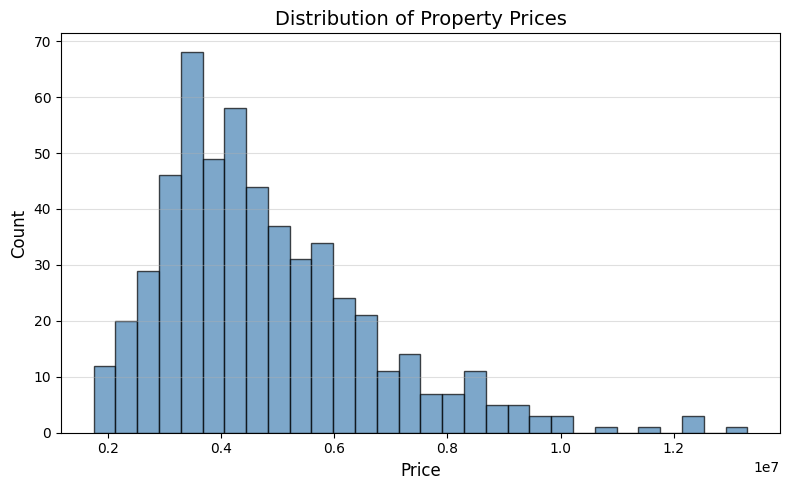

In [4]:
#distribution of property prices
plt.figure(figsize=(8,5))
plt.hist(df['price'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Property Prices", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

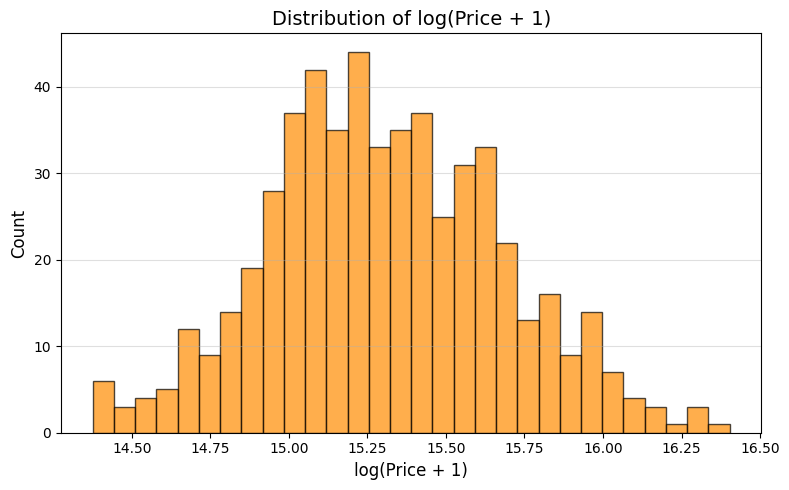

In [6]:
#log(price + 1) distribution
plt.figure(figsize=(8,5))
plt.hist(np.log1p(df['price']), bins=30, color='darkorange', edgecolor='black', alpha=0.7)
plt.title("Distribution of log(Price + 1)", fontsize=14)
plt.xlabel("log(Price + 1)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

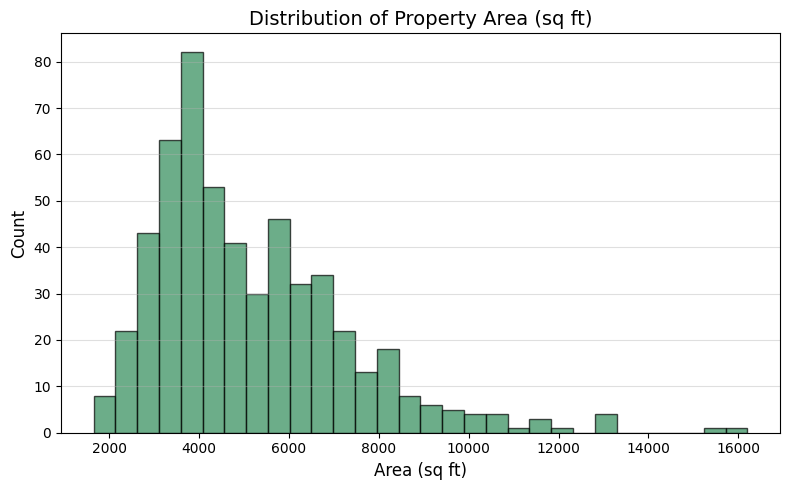

In [7]:
#distribution of property area
plt.figure(figsize=(8,5))
plt.hist(df['area'], bins=30, color='seagreen', edgecolor='black', alpha=0.7)
plt.title("Distribution of Property Area (sq ft)", fontsize=14)
plt.xlabel("Area (sq ft)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

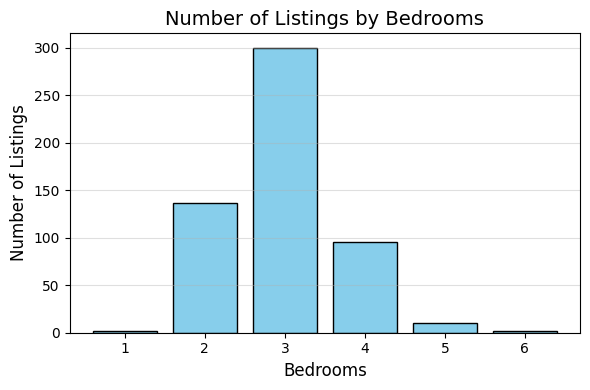

In [8]:
#bar chart: number of listings by bedrooms
if 'bedrooms' in df.columns:
    bed_counts = df['bedrooms'].value_counts().sort_index()
    plt.figure(figsize=(6,4))
    plt.bar(bed_counts.index.astype(str), bed_counts.values, color='skyblue', edgecolor='black')
    plt.title("Number of Listings by Bedrooms", fontsize=14)
    plt.xlabel("Bedrooms", fontsize=12)
    plt.ylabel("Number of Listings", fontsize=12)
    plt.grid(axis='y', alpha=0.4)
    plt.tight_layout()
    plt.show()

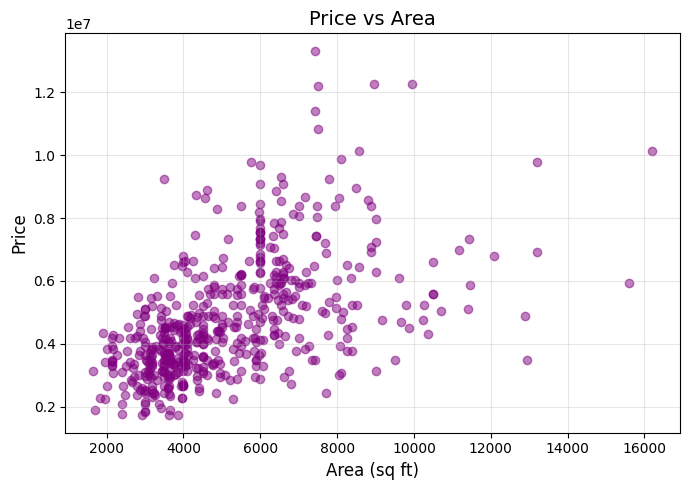

In [9]:
#scatterplot: price vs area
plt.figure(figsize=(7,5))
plt.scatter(df['area'], df['price'], color='purple', alpha=0.5)
plt.title("Price vs Area", fontsize=14)
plt.xlabel("Area (sq ft)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

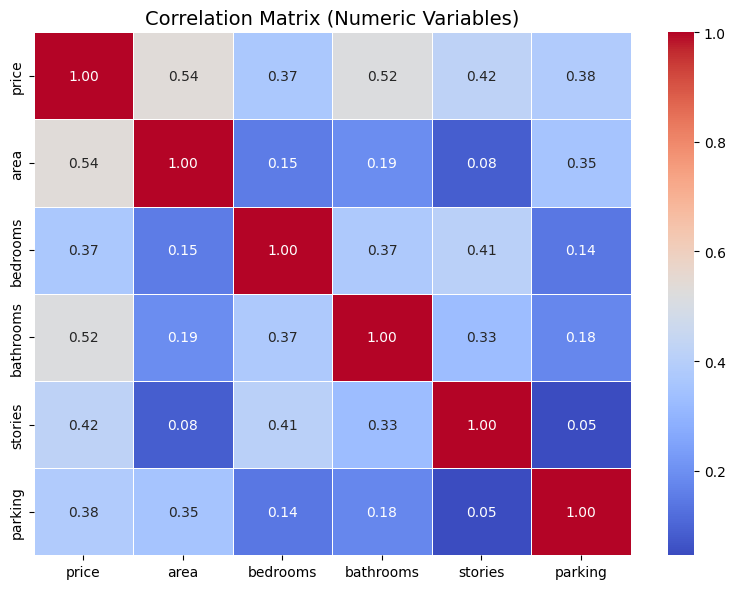

In [10]:
#correlation heatmap
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numeric Variables)", fontsize=14)
plt.tight_layout()
plt.show()

In [11]:
#determining if there was an impact on if the area was preferred or not
df.groupby('prefarea')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
prefarea,,,,,,,,
no,417.0,4.425299e+06,1.695811e+06,1750000.0,3255000.0,4095000.0,5110000.0,12250000.0
yes,128.0,5.879046e+06,1.984005e+06,2233000.0,4548250.0,5582500.0,6650000.0,13300000.0


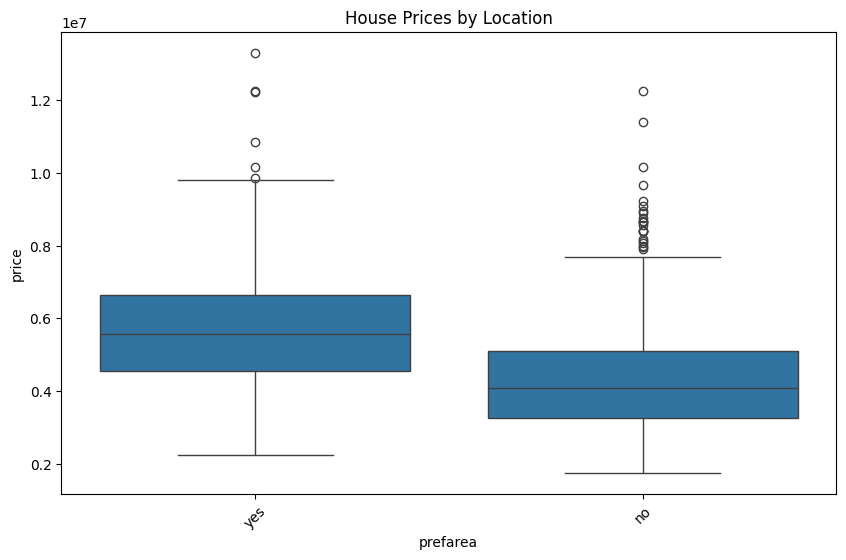

In [ ]:
#house prices by whether a location was preferred or not
plt.figure(figsize=(10,6))
sns.boxplot(x='prefarea', y='price', data=df)
plt.title('House Prices by Location')
plt.xticks(rotation=45)
plt.show()

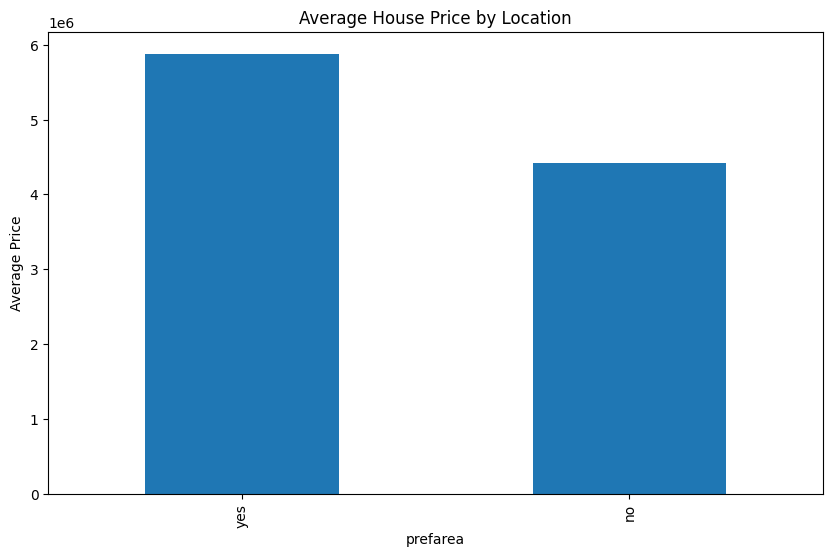

In [ ]:
#average house price by preferred location
avg_price = df.groupby('prefarea')['price'].mean().sort_values(ascending=False)
avg_price.plot(kind='bar', figsize=(10,6))
plt.title('Average House Price by Location')
plt.ylabel('Average Price')
plt.show()

In [18]:
#importing libraries
from scipy import stats

#determining anova and p value of whether preferred area affects price
groups = [group['price'].values for name, group in df.groupby('prefarea')]
f_stat, p_val = stats.f_oneway(*groups)
print("ANOVA F-statistic:", f_stat)
print("p-value:", p_val)

ANOVA F-statistic: 66.25864622289646
p-value: 2.7183744670735454e-15


In [13]:
#uploading second dataset (from GitHub: /housing/Housing 2.csv)
df2 = pd.read_csv("/Housing 2.csv")

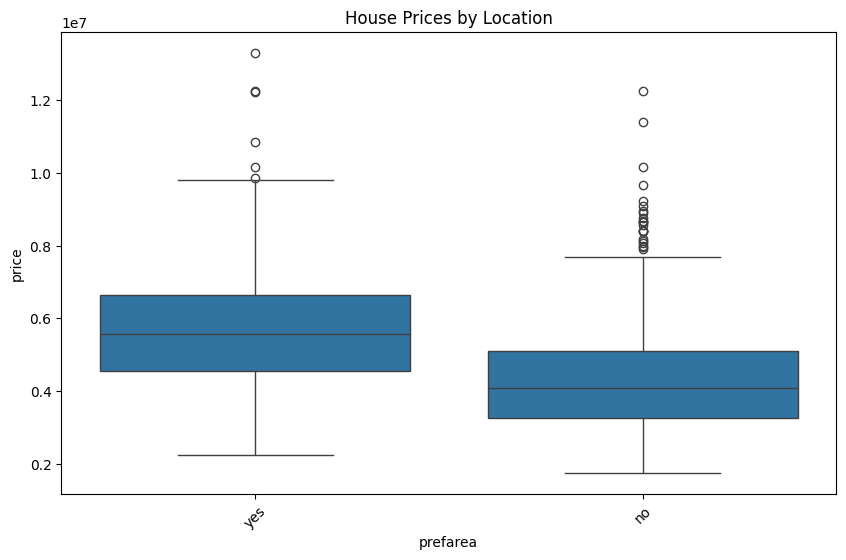

In [14]:
#describing preferred area and price for this dataset
df2.groupby('prefarea')['price'].describe()

#creating a boxplot for relation between preferred location and price
plt.figure(figsize=(10,6))
sns.boxplot(x='prefarea', y='price', data=df2)
plt.title('House Prices by Location')
plt.xticks(rotation=45)
plt.show()

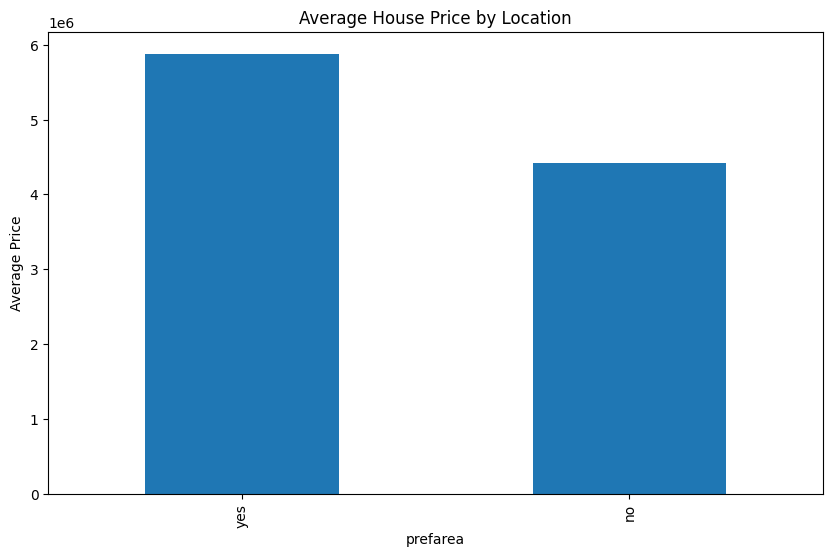

In [16]:
#same thing as before but applied to this dataset
avg_price = df2.groupby('prefarea')['price'].mean().sort_values(ascending=False)
avg_price.plot(kind='bar', figsize=(10,6))
plt.title('Average House Price by Location')
plt.ylabel('Average Price')
plt.show()

In [19]:
#finding anova and p val
groups = [group['price'].values for name, group in df2.groupby('prefarea')]
f_stat, p_val = stats.f_oneway(*groups)
print("ANOVA F-statistic:", f_stat)
print("p-value:", p_val)

ANOVA F-statistic: 66.25864622289646
p-value: 2.7183744670735454e-15
